In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
d = pd.read_csv(r'C:\Users\user\Downloads\C10_loan1.csv')
d

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [5]:
d['Home Owner'].value_counts()

No     7
Yes    3
Name: Home Owner, dtype: int64

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Home Owner          10 non-null     object
 1   Marital Status      10 non-null     object
 2   Annual Income       10 non-null     int64 
 3   Defaulted Borrower  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [8]:
d.columns

Index(['Home Owner', 'Marital Status', 'Annual Income', 'Defaulted Borrower'], dtype='object')

In [10]:
d1 = d[['Home Owner','Annual Income']]
d1

,Home Owner,Annual Income
0,Yes,125
1,No,100
2,No,70
3,Yes,120
4,No,95
5,No,60
6,Yes,220
7,No,85
8,No,75
9,No,90


In [11]:
d1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Home Owner     10 non-null     object
 1   Annual Income  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [12]:
d2 = d1.fillna(0)

In [13]:
g1 = {"Home Owner":{'Yes':1,'No':2}}
d2= d2.replace(g1)
print(d2)

   Home Owner  Annual Income
0           1            125
1           2            100
2           2             70
3           1            120
4           2             95
5           2             60
6           1            220
7           2             85
8           2             75
9           2             90


In [14]:
x = d2[['Annual Income']]
y = d2['Home Owner']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
y_train.shape

(7,)

In [19]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
parameters = {
    'max_depth':[10,20,50,60,30],
    'min_samples_leaf':[35,16,75,70,45],
    'n_estimators':[10,20,30,40,50]
}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid_search = GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50, 60, 30],
                         'min_samples_leaf': [35, 16, 75, 70, 45],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [23]:
grid_search.best_score_

0.5833333333333333

In [24]:
from sklearn.tree import plot_tree

In [25]:
rfc_best= grid_search.best_estimator_

[Text(2232.0, 1630.8, 'gini = 0.49\nsamples = 4\nvalue = [3, 4]\nclass = No')]

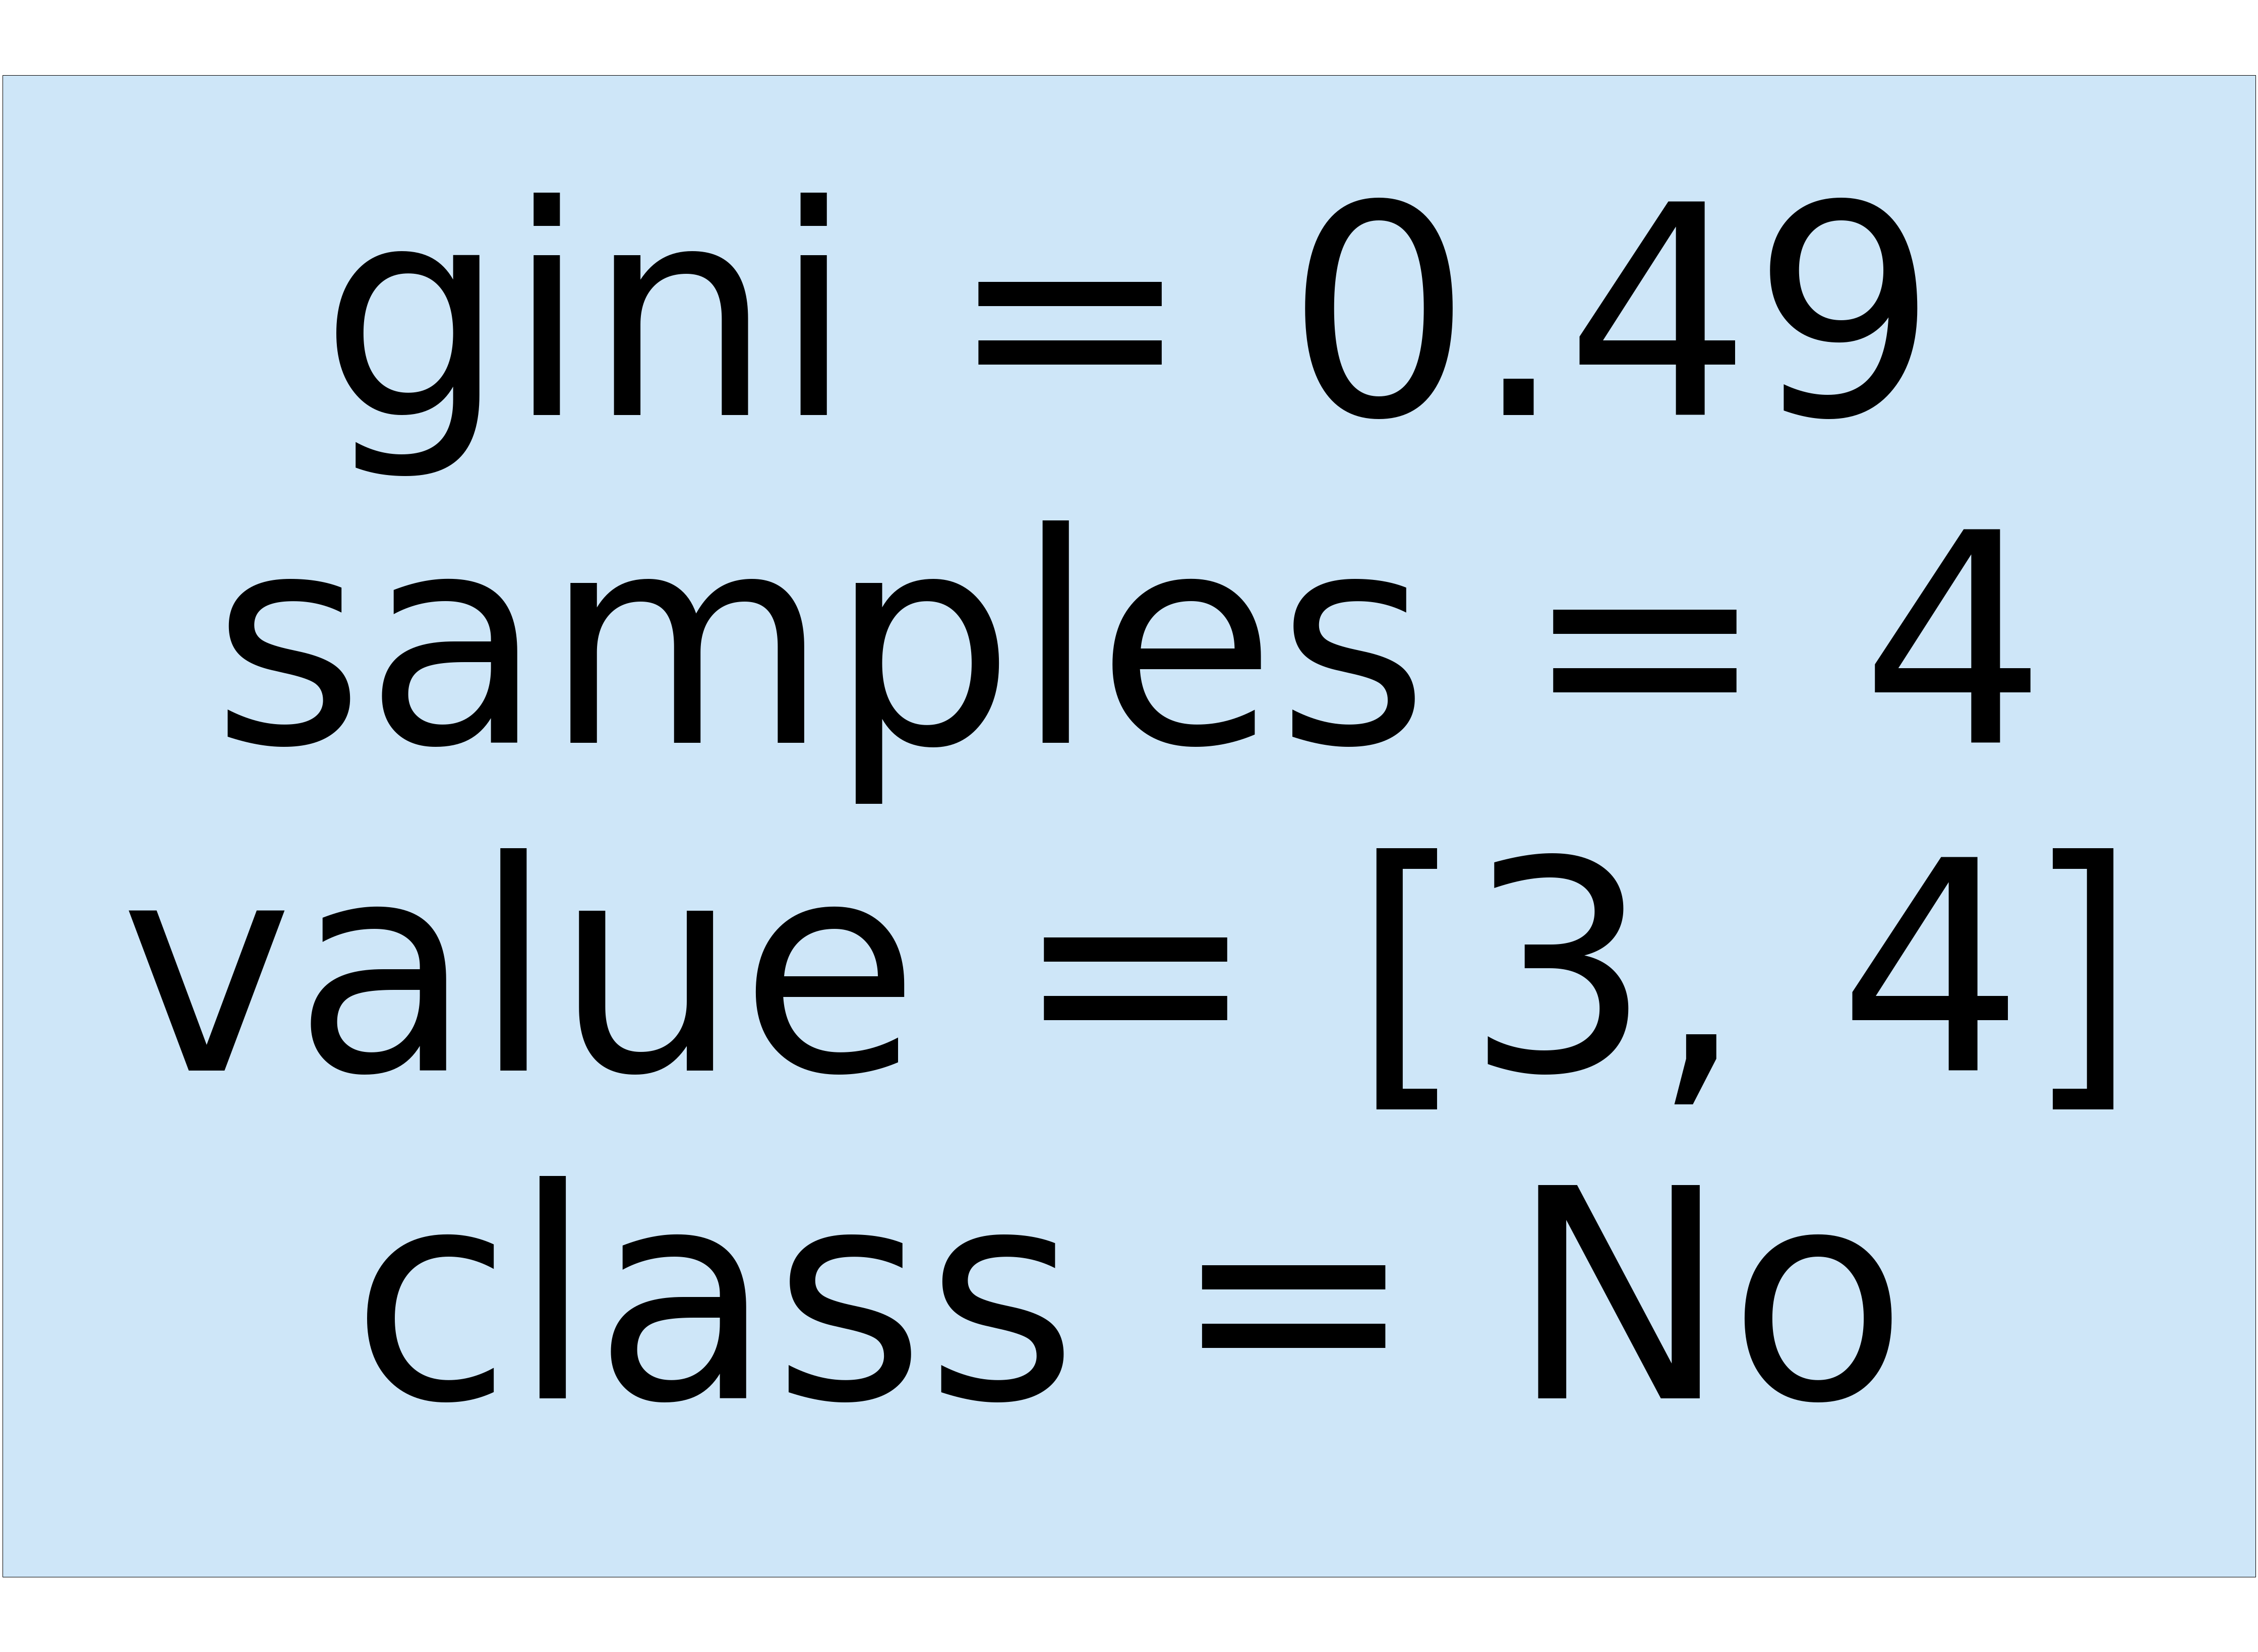

In [26]:
plt.figure(figsize=(80,60))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=["Yes","No"],filled=True)